<a href="https://colab.research.google.com/github/yu-hyeri/Data_analysis/blob/main/Interest_Rates_APT_Rentals_In_Korea.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 서울 아파트 전세 가격과 한국은행 금리의 상관관계를 분석한 코드입니다.
#-> 즉, 금리가 상승 또는 하락한다면 한국 아파트 전세 시장에는 얼마나 큰 영향을 미칠까?에 대해 분석해 봤습니다.
# 해당 코드 맨 마지막에는 머신러닝을 이용하여 전세 가격과 기준 금리를 예측한 결과표가 있습니다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
jeonse = pd.read_csv('/content/drive/MyDrive/개떡찰떡/DATA/monthly_apt_jeonse.csv')
jeonse

,지역명,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,...,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05
0,전국,82.739433,82.613184,82.517175,82.498353,82.497908,82.550769,82.628244,82.764992,82.931603,...,87.60530908,87.77795417,88.03195608,88.27558841,88.4090321,88.53551052,88.641814,88.805314,88.945806,89.044350
1,서울,78.587992,78.529117,78.552769,78.644545,78.746816,78.933886,79.099898,79.399492,79.681242,...,84.55386904,84.91176,85.44228714,85.97560884,86.3781877,86.76678481,87.008844,87.462183,87.996113,88.360752
2,강북14개구,78.931032,78.868462,78.886007,78.993583,79.074724,79.150134,79.214558,79.363258,79.480687,...,85.00666641,85.13883057,85.4876509,85.88213948,86.18450754,86.52661081,86.731478,87.210527,87.793347,88.193773
3,종로구,83.602818,83.51364,83.51364,83.535077,83.707085,83.707145,83.863709,83.936728,83.967058,...,89.81269962,90.17090214,90.48218735,91.01523991,91.81276627,92.39096325,92.680702,93.120846,93.607515,93.887104
4,중구,84.005742,84.005742,84.003095,84.005742,84.005742,84.005742,83.930472,83.999535,84.00879,...,85.27879979,85.41519733,85.64796028,85.87205302,86.3817525,86.92301828,87.248875,88.097229,88.972821,89.541728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,무주군,-,-,-,-,-,-,-,-,-,...,111.8040213,111.8040213,111.8040213,117.9889246,117.9889246,117.9889246,117.988925,117.988925,117.988925,117.988925
274,임실군,-,-,-,-,-,-,-,-,-,...,101.195498,101.195498,101.195498,101.195498,101.195498,104.9014943,104.901494,104.901494,105.749597,106.308787
275,순창군,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,99.274467,99.274467,99.274467,99.274467
276,고창군,-,-,-,-,-,-,-,-,-,...,105.2622508,105.2622508,105.2622508,105.2622508,105.2622508,107.0683033,107.640547,108.015050,108.228279,109.098842


In [ ]:
jeonse_seoul = jeonse[jeonse['지역명'] == '서울']
jeonse_seoul

,지역명,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,...,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05
1,서울,78.587992,78.529117,78.552769,78.644545,78.746816,78.933886,79.099898,79.399492,79.681242,...,84.55386904,84.91176,85.44228714,85.97560884,86.3781877,86.76678481,87.008844,87.462183,87.996113,88.360752


In [ ]:
pd.set_option('display.max_columns', None) # 모든 열을 표시
pd.set_option('display.max_rows', None) # 모든 행을 표시

In [ ]:
jeonse_seoul.to_csv('jeonse_seoul.csv', index=False) #표 저장

In [ ]:
import pandas as pd

jeonse_seoul = pd.read_csv('jeonse_seoul.csv')
jeonse_seoul


,지역명,2019-05,2019-06,2019-07,2019-08,2019-09,2019-10,2019-11,2019-12,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03,2022-04,2022-05,2022-06,2022-07,2022-08,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,2023-06,2023-07,2023-08,2023-09,2023-10,2023-11,2023-12,2024-01,2024-02,2024-03,2024-04,2024-05
0,서울,78.587992,78.529117,78.552769,78.644545,78.746816,78.933886,79.099898,79.399492,79.681242,79.884973,80.032447,80.087,80.132809,80.415524,81.220105,82.177054,83.896087,85.035048,87.387632,89.123855,90.480045,91.476134,92.207568,92.723002,93.392746,94.774128,95.814962,96.876152,97.866394,98.343551,99.245559,99.695779,100,100.109224,100.087187,100.152183,100.411903,100.578672,100.641339,100.499797,100.308052,99.64213,97.462394,94.259268,90.50446,88.124901,86.543271,85.473109,84.834676,84.729893,84.52346,84.553869,84.91176,85.442287,85.975609,86.378188,86.766785,87.008844,87.462183,87.996113,88.360752


In [ ]:
jeonse_seoul_t = jeonse_seoul.T
jeonse_seoul_t

,0
지역명,서울
2019-05,78.587992
2019-06,78.529117
2019-07,78.552769
2019-08,78.644545
2019-09,78.746816
2019-10,78.933886
2019-11,79.099898
2019-12,79.399492
2020-01,79.681242


<ipython-input-10-28283b4ff03b>:43: UserWarning: Glyph 45216 (\N{HANGUL SYLLABLE NAL}) missing from current font.
  plt.tight_layout()
<ipython-input-10-28283b4ff03b>:43: UserWarning: Glyph 51676 (\N{HANGUL SYLLABLE JJA}) missing from current font.
  plt.tight_layout()
<ipython-input-10-28283b4ff03b>:43: UserWarning: Glyph 51204 (\N{HANGUL SYLLABLE JEON}) missing from current font.
  plt.tight_layout()
<ipython-input-10-28283b4ff03b>:43: UserWarning: Glyph 49464 (\N{HANGUL SYLLABLE SE}) missing from current font.
  plt.tight_layout()
<ipython-input-10-28283b4ff03b>:43: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  plt.tight_layout()
<ipython-input-10-28283b4ff03b>:43: UserWarning: Glyph 44201 (\N{HANGUL SYLLABLE GYEOG}) missing from current font.
  plt.tight_layout()
<ipython-input-10-28283b4ff03b>:43: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  plt.tight_layout()
<ipython-input-10-28283b4ff03b>:43: UserWarning: Glyph

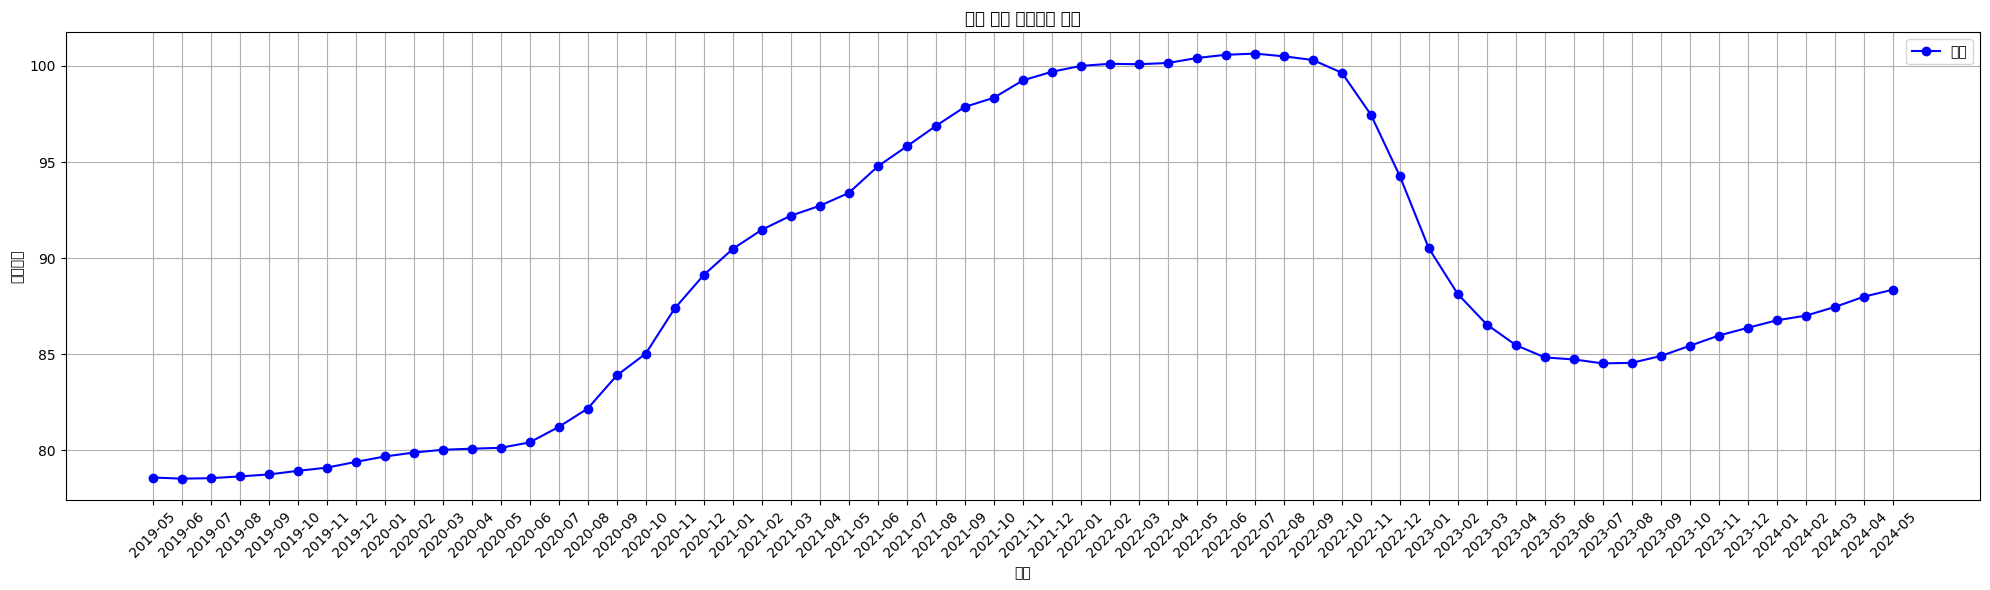

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터 준비
data = {
    '날짜': [
        '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
        '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
        '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04',
        '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
        '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08',
        '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04',
        '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
        '2024-01', '2024-02', '2024-03', '2024-04', '2024-05'
    ],
    '전세가격': [
        78.587992, 78.529117, 78.552769, 78.644545, 78.746816, 78.933886, 79.099898, 79.399492,
        79.681242, 79.884973, 80.032447, 80.087, 80.132809, 80.415524, 81.220105, 82.177054,
        83.896087, 85.035048, 87.387632, 89.123855, 90.480045, 91.476134, 92.207568, 92.723002,
        93.392746, 94.774128, 95.814962, 96.876152, 97.866394, 98.343551, 99.245559, 99.695779,
        100, 100.109224, 100.087187, 100.152183, 100.411903, 100.578672, 100.641339, 100.499797,
        100.308052, 99.64213, 97.462394, 94.259268, 90.50446, 88.124901, 86.543271, 85.473109,
        84.834676, 84.729893, 84.52346, 84.553869, 84.91176, 85.442287, 85.975609, 86.378188,
        86.766785, 87.008844, 87.462183, 87.996113, 88.360752
    ]
}

# 데이터프레임 생성
df = pd.DataFrame(data)

# 날짜 열을 인덱스로 설정
df.set_index('날짜', inplace=True)

# 선 그래프 그리기
plt.figure(figsize=(20, 6))
plt.plot(df.index, df['전세가격'], marker='o', linestyle='-', color='b', label='서울')
plt.title('서울 지역 전세가격 변화')
plt.xlabel('날짜')
plt.ylabel('전세가격')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
#글꼴 에러 해결 코드 - 1
!apt-get update -qq
!apt-get install -qq fonts-nanum

Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [ ]:
#글꼴 에러 해결 코드 - 2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd

# Add font and rebuild cache
fm.fontManager.addfont('/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
# Rebuild is automatically triggered when adding a font in current versions

# Set font
plt.rc('font', family='NanumGothic')

In [ ]:
import pandas as pd

In [ ]:
korea_bank = pd.read_csv('/content/drive/MyDrive/개떡찰떡/DATA/korea_bank.csv')

In [ ]:
pd.set_option('display.max_columns', None) # 모든 열을 표시
pd.set_option('display.max_rows', None) # 모든 행을 표시

In [ ]:
korea_bank_t = korea_bank.T

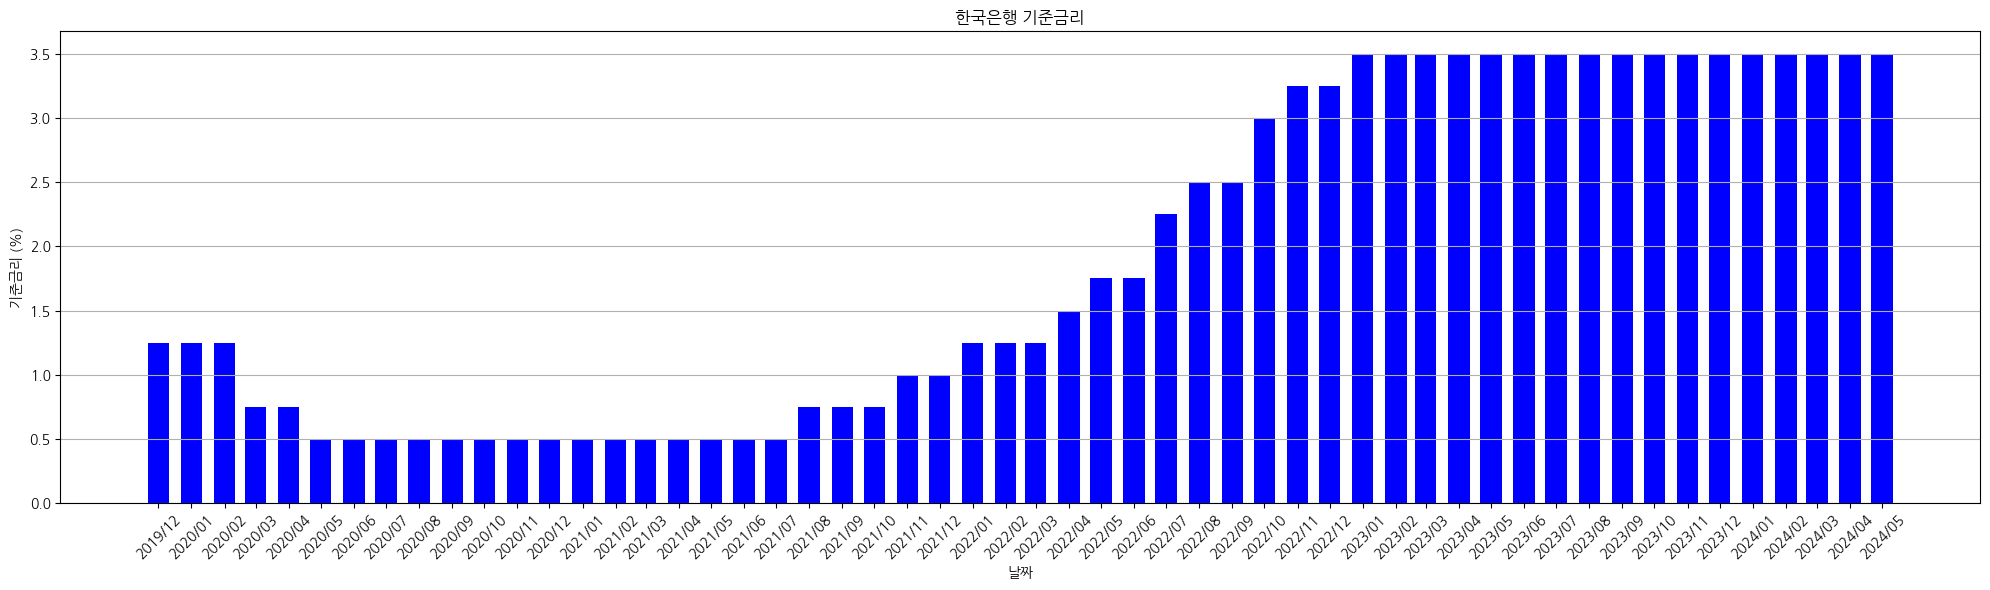

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
import matplotlib.dates as mdates

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')

# 데이터 준비
data = {
'Date': [
'2019/12', '2020/01', '2020/02', '2020/03', '2020/04', '2020/05', '2020/06',
'2020/07', '2020/08', '2020/09', '2020/10', '2020/11', '2020/12', '2021/01',
'2021/02', '2021/03', '2021/04', '2021/05', '2021/06', '2021/07', '2021/08',
'2021/09', '2021/10', '2021/11', '2021/12', '2022/01', '2022/02', '2022/03',
'2022/04', '2022/05', '2022/06', '2022/07', '2022/08', '2022/09', '2022/10',
'2022/11', '2022/12', '2023/01', '2023/02', '2023/03', '2023/04', '2023/05',
'2023/06', '2023/07', '2023/08', '2023/09', '2023/10', '2023/11', '2023/12',
'2024/01', '2024/02', '2024/03', '2024/04', '2024/05'
],
'Interest Rate (%)': [
1.25, 1.25, 1.25, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 1.0, 1.0, 1.25, 1.25, 1.25,
1.5, 1.75, 1.75, 2.25, 2.5, 2.5, 3.0, 3.25, 3.25, 3.5, 3.5, 3.5, 3.5, 3.5,
3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5
]
}

df = pd.DataFrame(data)

# 날짜 형식으로 변환
df['Date'] = pd.to_datetime(df['Date'], format='%Y/%m')

# 바 그래프 그리기
plt.figure(figsize=(20, 6))
plt.bar(df['Date'], df['Interest Rate (%)'], color='b', width=20)
plt.title('한국은행 기준금리')
plt.xlabel('날짜')
plt.ylabel('기준금리 (%)')

# 날짜 포맷 변경 및 모든 날짜 라벨 표시
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(df['Date'], rotation=45)

plt.grid(axis='y')
plt.tight_layout()
plt.show()

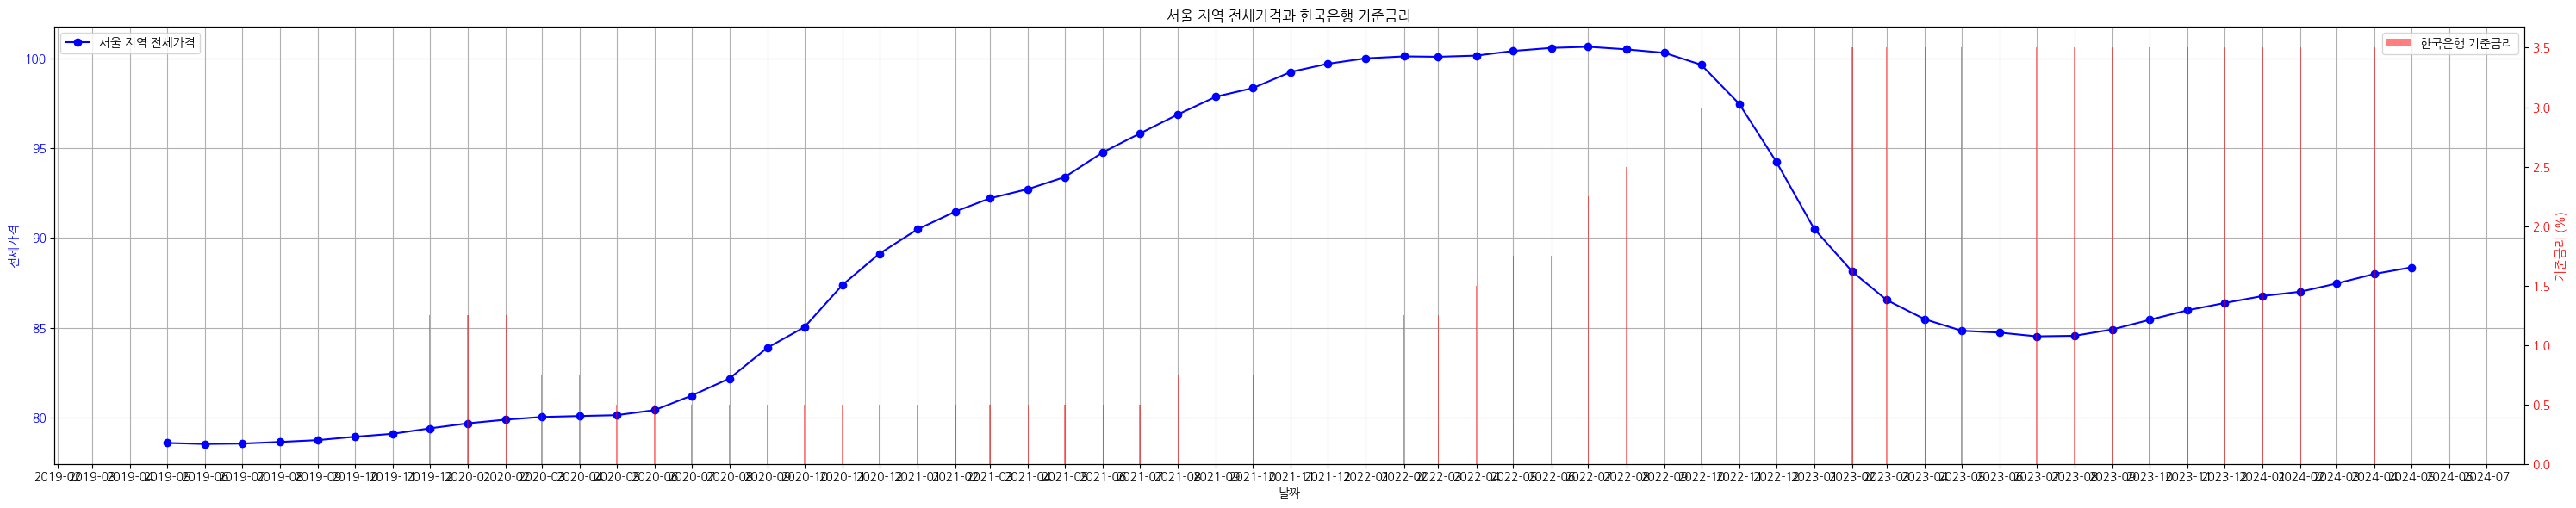

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 데이터 준비 - 선 그래프용 데이터
data1 = {
    '날짜': [
        '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
        '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
        '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04',
        '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
        '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08',
        '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04',
        '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
        '2024-01', '2024-02', '2024-03', '2024-04', '2024-05'
    ],
    '전세가격': [
        78.587992, 78.529117, 78.552769, 78.644545, 78.746816, 78.933886, 79.099898, 79.399492,
        79.681242, 79.884973, 80.032447, 80.087, 80.132809, 80.415524, 81.220105, 82.177054,
        83.896087, 85.035048, 87.387632, 89.123855, 90.480045, 91.476134, 92.207568, 92.723002,
        93.392746, 94.774128, 95.814962, 96.876152, 97.866394, 98.343551, 99.245559, 99.695779,
        100, 100.109224, 100.087187, 100.152183, 100.411903, 100.578672, 100.641339, 100.499797,
        100.308052, 99.64213, 97.462394, 94.259268, 90.50446, 88.124901, 86.543271, 85.473109,
        84.834676, 84.729893, 84.52346, 84.553869, 84.91176, 85.442287, 85.975609, 86.378188,
        86.766785, 87.008844, 87.462183, 87.996113, 88.360752
    ]
}

# 데이터프레임 생성 - 선 그래프용
df1 = pd.DataFrame(data1)
df1['날짜'] = pd.to_datetime(df1['날짜'])

# 데이터 준비 - 막대 그래프용 데이터
data2 = {
    'Date': [
        '2019/12', '2020/01', '2020/02', '2020/03', '2020/04', '2020/05', '2020/06',
        '2020/07', '2020/08', '2020/09', '2020/10', '2020/11', '2020/12', '2021/01',
        '2021/02', '2021/03', '2021/04', '2021/05', '2021/06', '2021/07', '2021/08',
        '2021/09', '2021/10', '2021/11', '2021/12', '2022/01', '2022/02', '2022/03',
        '2022/04', '2022/05', '2022/06', '2022/07', '2022/08', '2022/09', '2022/10',
        '2022/11', '2022/12', '2023/01', '2023/02', '2023/03', '2023/04', '2023/05',
        '2023/06', '2023/07', '2023/08', '2023/09', '2023/10', '2023/11', '2023/12',
        '2024/01', '2024/02', '2024/03', '2024/04', '2024/05'
    ],
    'Interest Rate (%)': [
        1.25, 1.25, 1.25, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 1.0, 1.0, 1.25, 1.25, 1.25,
        1.5, 1.75, 1.75, 2.25, 2.5, 2.5, 3.0, 3.25, 3.25, 3.5, 3.5, 3.5, 3.5, 3.5,
        3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5
    ]
}

# 데이터프레임 생성 - 막대 그래프용
df2 = pd.DataFrame(data2)
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y/%m')

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(30, 6))

# 선 그래프
ax1.plot(df1['날짜'], df1['전세가격'], marker='o', linestyle='-', color='b', label='서울 지역 전세가격')
ax1.set_xlabel('날짜')
ax1.set_ylabel('전세가격', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)
ax1.legend(loc='upper left')

# 막대 그래프
ax2 = ax1.twinx()
ax2.bar(df2['Date'], df2['Interest Rate (%)'], color='r', alpha=0.5, label='한국은행 기준금리')
ax2.set_ylabel('기준금리 (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.grid(False)  # 오른쪽 y축의 그리드는 필요 없으므로 False로 설정
ax2.legend(loc='upper right')

# 날짜 포맷 변경
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())

# 그래프 출력
plt.title('서울 지역 전세가격과 한국은행 기준금리')
plt.tight_layout()
plt.show()


<Axes: xlabel='날짜', ylabel='전세가격'>

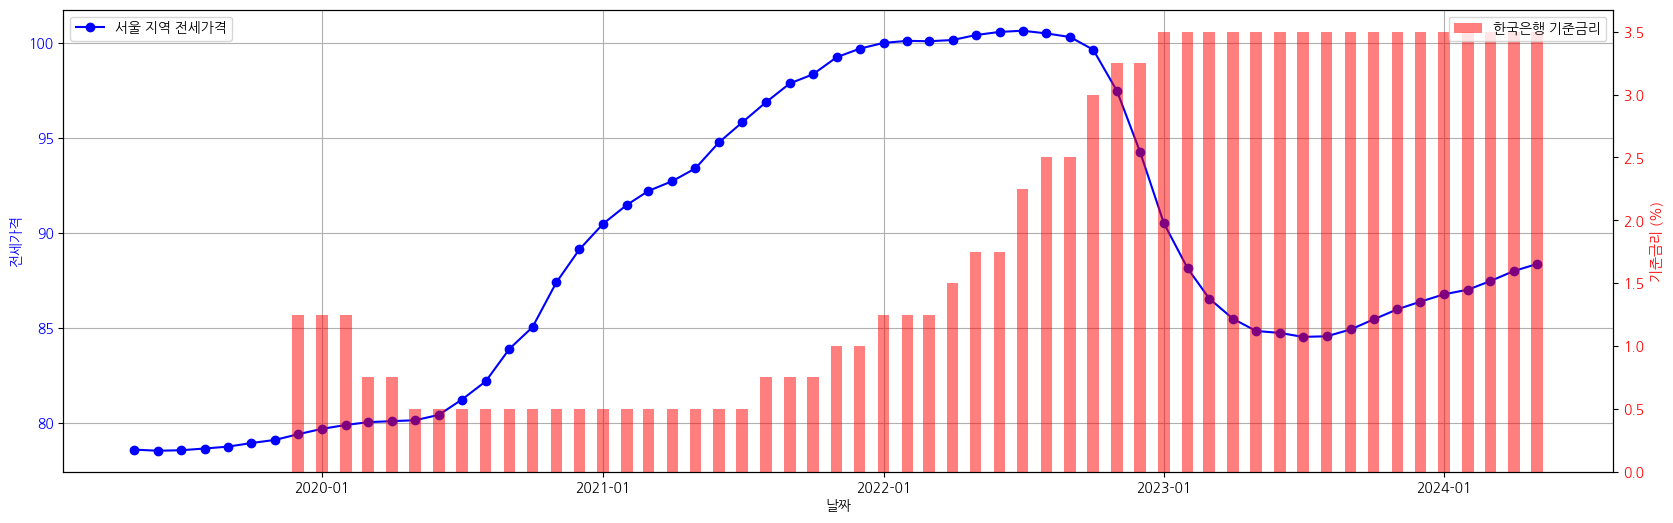

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 데이터 준비 - 선 그래프용 데이터
data1 = {
    '날짜': [
        '2019-05', '2019-06', '2019-07', '2019-08', '2019-09', '2019-10', '2019-11', '2019-12',
        '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
        '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04',
        '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
        '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08',
        '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04',
        '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
        '2024-01', '2024-02', '2024-03', '2024-04', '2024-05'
    ],
    '전세가격': [
        78.587992, 78.529117, 78.552769, 78.644545, 78.746816, 78.933886, 79.099898, 79.399492,
        79.681242, 79.884973, 80.032447, 80.087, 80.132809, 80.415524, 81.220105, 82.177054,
        83.896087, 85.035048, 87.387632, 89.123855, 90.480045, 91.476134, 92.207568, 92.723002,
        93.392746, 94.774128, 95.814962, 96.876152, 97.866394, 98.343551, 99.245559, 99.695779,
        100, 100.109224, 100.087187, 100.152183, 100.411903, 100.578672, 100.641339, 100.499797,
        100.308052, 99.64213, 97.462394, 94.259268, 90.50446, 88.124901, 86.543271, 85.473109,
        84.834676, 84.729893, 84.52346, 84.553869, 84.91176, 85.442287, 85.975609, 86.378188,
        86.766785, 87.008844, 87.462183, 87.996113, 88.360752
    ]
}

# 데이터프레임 생성 - 선 그래프용
df1 = pd.DataFrame(data1)
df1['날짜'] = pd.to_datetime(df1['날짜'])

# 데이터 준비 - 막대 그래프용 데이터
data2 = {
    'Date': [
        '2019/12', '2020/01', '2020/02', '2020/03', '2020/04', '2020/05', '2020/06',
        '2020/07', '2020/08', '2020/09', '2020/10', '2020/11', '2020/12', '2021/01',
        '2021/02', '2021/03', '2021/04', '2021/05', '2021/06', '2021/07', '2021/08',
        '2021/09', '2021/10', '2021/11', '2021/12', '2022/01', '2022/02', '2022/03',
        '2022/04', '2022/05', '2022/06', '2022/07', '2022/08', '2022/09', '2022/10',
        '2022/11', '2022/12', '2023/01', '2023/02', '2023/03', '2023/04', '2023/05',
        '2023/06', '2023/07', '2023/08', '2023/09', '2023/10', '2023/11', '2023/12',
        '2024/01', '2024/02', '2024/03', '2024/04', '2024/05'
    ],
    'Interest Rate (%)': [
        1.25, 1.25, 1.25, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 1.0, 1.0, 1.25, 1.25, 1.25,
        1.5, 1.75, 1.75, 2.25, 2.5, 2.5, 3.0, 3.25, 3.25, 3.5, 3.5, 3.5, 3.5, 3.5,
        3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5
    ]
}

# 데이터프레임 생성 - 막대 그래프용
df2 = pd.DataFrame(data2)
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y/%m')

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 6))

# 선 그래프
ax1.plot(df1['날짜'], df1['전세가격'], marker='o', linestyle='-', color='b', label='서울 지역 전세가격')
ax1.set_xlabel('날짜')
ax1.set_ylabel('전세가격', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)
ax1.legend(loc='upper left')

# 막대 그래프
ax2 = ax1.twinx()
ax2.bar(df2['Date'], df2['Interest Rate (%)'], color='r', alpha=0.5, width=15, label='한국은행 기준금리')
ax2.set_ylabel('기준금리 (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.grid(False)  # 오른쪽 y축의 그리드는 필요 없으므로 False로 설정
ax2.legend(loc='upper right')

# 날짜 포맷 변경
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1


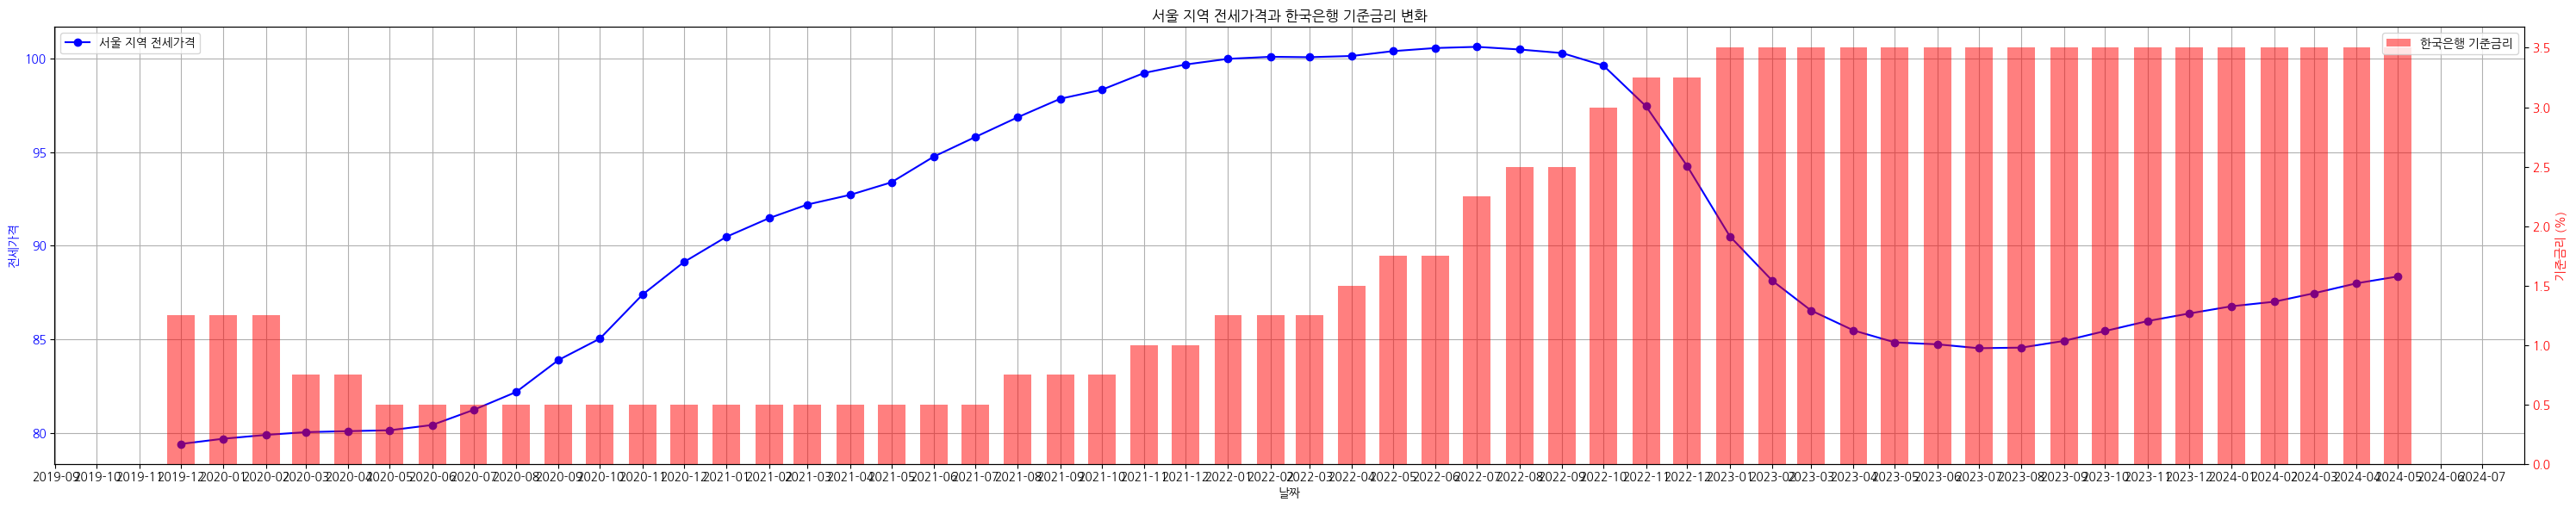

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 데이터 준비 - 선 그래프용 데이터
data1 = {
    '날짜': [
        '2019-12', '2020-01', '2020-02', '2020-03', '2020-04', '2020-05', '2020-06', '2020-07', '2020-08',
        '2020-09', '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04',
        '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12',
        '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08',
        '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04',
        '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
        '2024-01', '2024-02', '2024-03', '2024-04', '2024-05'
    ],
    '전세가격': [
        79.399492, 79.681242, 79.884973, 80.032447, 80.087, 80.132809, 80.415524, 81.220105, 82.177054,
        83.896087, 85.035048, 87.387632, 89.123855, 90.480045, 91.476134, 92.207568, 92.723002,
        93.392746, 94.774128, 95.814962, 96.876152, 97.866394, 98.343551, 99.245559, 99.695779,
        100, 100.109224, 100.087187, 100.152183, 100.411903, 100.578672, 100.641339, 100.499797,
        100.308052, 99.64213, 97.462394, 94.259268, 90.50446, 88.124901, 86.543271, 85.473109,
        84.834676, 84.729893, 84.52346, 84.553869, 84.91176, 85.442287, 85.975609, 86.378188,
        86.766785, 87.008844, 87.462183, 87.996113, 88.360752
    ]
}

# 데이터프레임 생성 - 선 그래프용
df1 = pd.DataFrame(data1)
df1['날짜'] = pd.to_datetime(df1['날짜'])

# 데이터 준비 - 막대 그래프용 데이터
data2 = {
    'Date': [
        '2019/12', '2020/01', '2020/02', '2020/03', '2020/04', '2020/05', '2020/06',
        '2020/07', '2020/08', '2020/09', '2020/10', '2020/11', '2020/12', '2021/01',
        '2021/02', '2021/03', '2021/04', '2021/05', '2021/06', '2021/07', '2021/08',
        '2021/09', '2021/10', '2021/11', '2021/12', '2022/01', '2022/02', '2022/03',
        '2022/04', '2022/05', '2022/06', '2022/07', '2022/08', '2022/09', '2022/10',
        '2022/11', '2022/12', '2023/01', '2023/02', '2023/03', '2023/04', '2023/05',
        '2023/06', '2023/07', '2023/08', '2023/09', '2023/10', '2023/11', '2023/12',
        '2024/01', '2024/02', '2024/03', '2024/04', '2024/05'
    ],
    'Interest Rate (%)': [
        1.25, 1.25, 1.25, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 1.0, 1.0, 1.25, 1.25, 1.25,
        1.5, 1.75, 1.75, 2.25, 2.5, 2.5, 3.0, 3.25, 3.25, 3.5, 3.5, 3.5, 3.5, 3.5,
        3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5
    ]
}

# 데이터프레임 생성 - 막대 그래프용
df2 = pd.DataFrame(data2)
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y/%m')

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(30, 6))

# 선 그래프
ax1.plot(df1['날짜'], df1['전세가격'], marker='o', linestyle='-', color='b', label='서울 지역 전세가격')
ax1.set_xlabel('날짜')
ax1.set_ylabel('전세가격', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)
ax1.legend(loc='upper left')

# 막대 그래프
ax2 = ax1.twinx()
ax2.bar(df2['Date'], df2['Interest Rate (%)'], color='r', alpha=0.5, width=20, label='한국은행 기준금리')
ax2.set_ylabel('기준금리 (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.grid(False)  # 오른쪽 y축의 그리드는 필요 없으므로 False로 설정
ax2.legend(loc='upper right')

# 날짜 포맷 변경 - 월별로 표시
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())

# 그래프 출력
plt.title('서울 지역 전세가격과 한국은행 기준금리 변화')
plt.tight_layout()
plt.show()


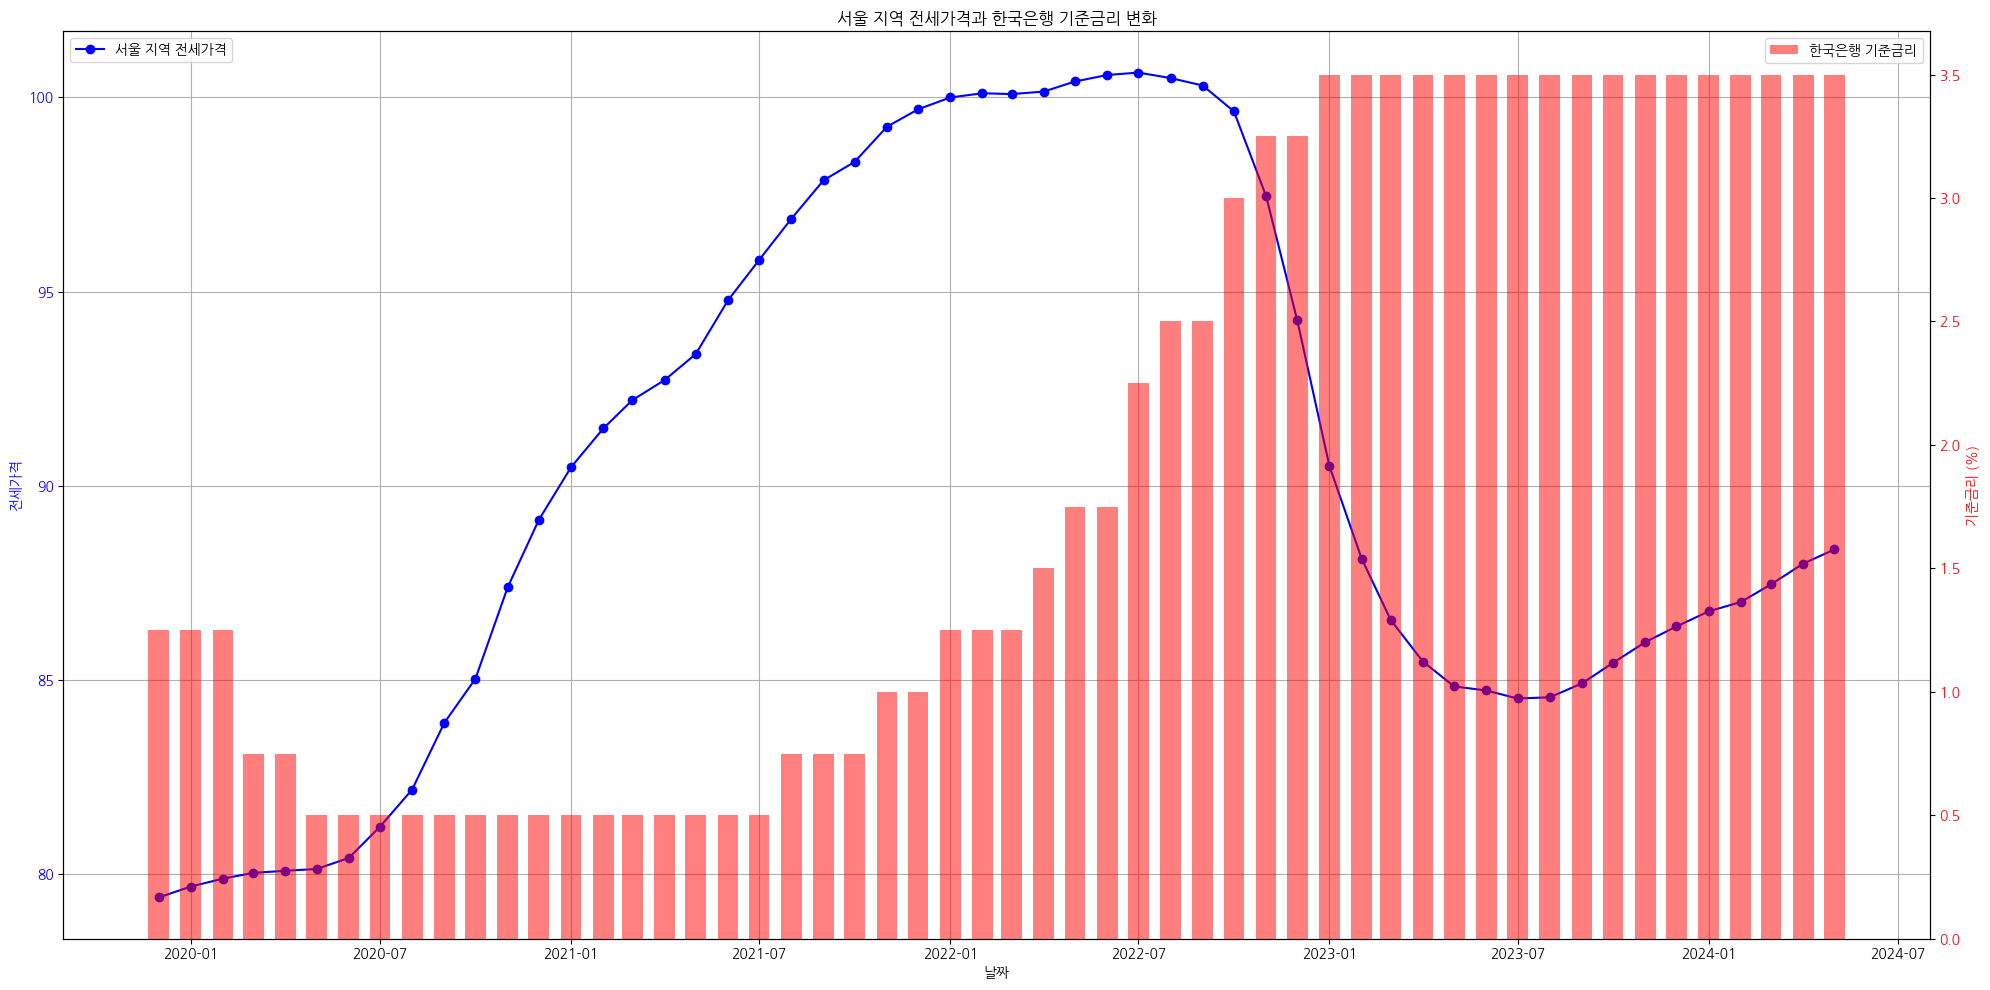

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 데이터 준비 - 선 그래프용 데이터
data1 = {
    'Date': pd.date_range(start='2019-12-01', end='2024-05-01', freq='MS'),
    '전세가격': [
        79.399492, 79.681242, 79.884973, 80.032447, 80.087, 80.132809, 80.415524, 81.220105, 82.177054,
        83.896087, 85.035048, 87.387632, 89.123855, 90.480045, 91.476134, 92.207568, 92.723002,
        93.392746, 94.774128, 95.814962, 96.876152, 97.866394, 98.343551, 99.245559, 99.695779,
        100, 100.109224, 100.087187, 100.152183, 100.411903, 100.578672, 100.641339, 100.499797,
        100.308052, 99.64213, 97.462394, 94.259268, 90.50446, 88.124901, 86.543271, 85.473109,
        84.834676, 84.729893, 84.52346, 84.553869, 84.91176, 85.442287, 85.975609, 86.378188,
        86.766785, 87.008844, 87.462183, 87.996113, 88.360752
    ]
}

# 데이터프레임 생성 - 선 그래프용
df1 = pd.DataFrame(data1)
df1['Date'] = pd.to_datetime(df1['Date'])

# 데이터 준비 - 막대 그래프용 데이터
data2 = {
    'Date': pd.date_range(start='2019-12-01', end='2024-05-01', freq='MS'),
    'Interest Rate (%)': [
        1.25, 1.25, 1.25, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 1.0, 1.0, 1.25, 1.25, 1.25,
        1.5, 1.75, 1.75, 2.25, 2.5, 2.5, 3.0, 3.25, 3.25, 3.5, 3.5, 3.5, 3.5, 3.5,
        3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5
    ]
}

# 데이터프레임 생성 - 막대 그래프용
df2 = pd.DataFrame(data2)
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y/%m')

# 그래프 그리기
fig, ax1 = plt.subplots(figsize=(20, 10))

# 선 그래프
ax1.plot(df1['Date'], df1['전세가격'], marker='o', linestyle='-', color='b', label='서울 지역 전세가격')
ax1.set_xlabel('날짜')
ax1.set_ylabel('전세가격', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.grid(True)
ax1.legend(loc='upper left')

# 막대 그래프
ax2 = ax1.twinx()
ax2.bar(df2['Date'], df2['Interest Rate (%)'], color='r', alpha=0.5, width=20, label='한국은행 기준금리')
ax2.set_ylabel('기준금리 (%)', color='r')
ax2.tick_params(axis='y', labelcolor='r')
ax2.grid(False)  # 오른쪽 y축의 그리드는 필요 없으므로 False로 설정
ax2.legend(loc='upper right')

# 그래프 출력
plt.title('서울 지역 전세가격과 한국은행 기준금리 변화')
plt.tight_layout()
plt.show()


                       전세가격  Interest Rate (%)
전세가격               1.000000          -0.080009
Interest Rate (%) -0.080009           1.000000


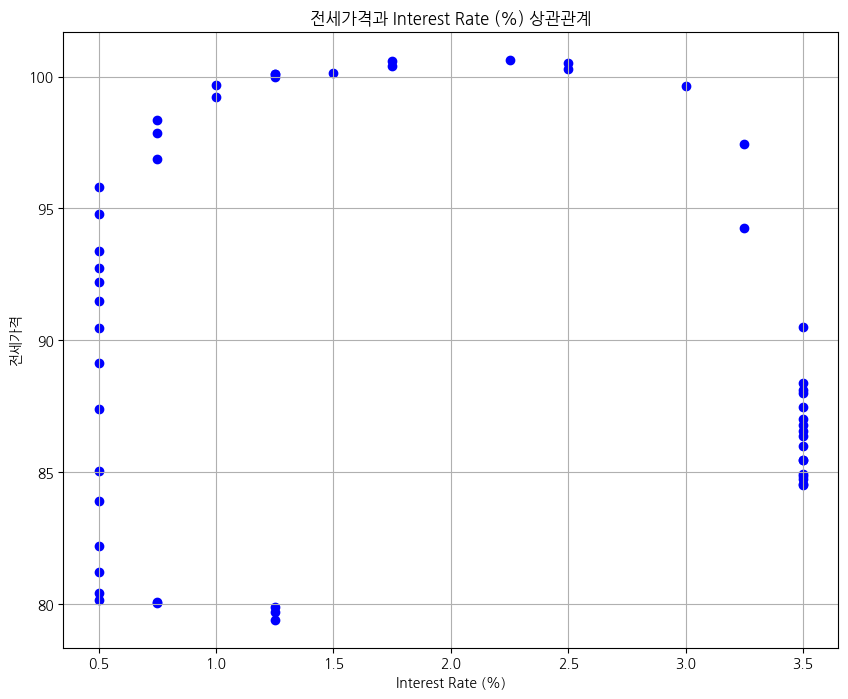

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 데이터 준비 - 선 그래프용 데이터
data1 = {
    'Date': pd.date_range(start='2019-12-01', end='2024-05-01', freq='MS'),
    '전세가격': [
        79.399492, 79.681242, 79.884973, 80.032447, 80.087, 80.132809, 80.415524, 81.220105, 82.177054,
        83.896087, 85.035048, 87.387632, 89.123855, 90.480045, 91.476134, 92.207568, 92.723002,
        93.392746, 94.774128, 95.814962, 96.876152, 97.866394, 98.343551, 99.245559, 99.695779,
        100, 100.109224, 100.087187, 100.152183, 100.411903, 100.578672, 100.641339, 100.499797,
        100.308052, 99.64213, 97.462394, 94.259268, 90.50446, 88.124901, 86.543271, 85.473109,
        84.834676, 84.729893, 84.52346, 84.553869, 84.91176, 85.442287, 85.975609, 86.378188,
        86.766785, 87.008844, 87.462183, 87.996113, 88.360752
    ]
}

# 데이터프레임 생성 - 선 그래프용
df1 = pd.DataFrame(data1)
df1['Date'] = pd.to_datetime(df1['Date'])

# 데이터 준비 - 막대 그래프용 데이터
data2 = {
    'Date': pd.date_range(start='2019-12-01', end='2024-05-01', freq='MS'),
    'Interest Rate (%)': [
        1.25, 1.25, 1.25, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 1.0, 1.0, 1.25, 1.25, 1.25,
        1.5, 1.75, 1.75, 2.25, 2.5, 2.5, 3.0, 3.25, 3.25, 3.5, 3.5, 3.5, 3.5, 3.5,
        3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5
    ]
}

# 데이터프레임 생성 - 막대 그래프용
df2 = pd.DataFrame(data2)
df2['Date'] = pd.to_datetime(df2['Date'], format='%Y/%m')

# 데이터 병합
merged_df = pd.merge(df1, df2, on='Date')

# 상관관계 계산
correlation = merged_df[['전세가격', 'Interest Rate (%)']].corr()
print(correlation)

# 상관관계 시각화
plt.figure(figsize=(10, 8))
plt.scatter(merged_df['Interest Rate (%)'], merged_df['전세가격'], color='blue')
plt.xlabel('Interest Rate (%)')
plt.ylabel('전세가격')
plt.title('전세가격과 Interest Rate (%) 상관관계')
plt.grid(True)
plt.show()


상관계수 -0.080009:

전세가격과 이자율 간의 상관계수는 -0.080009입니다.
이 값은 매우 약한 음의 상관관계를 나타냅니다.
이는 이자율이 오를 때 전세가격이 약간 내릴 가능성이 있다는 것을 의미하지만, 그 관계는 매우 약합니다.

상관관계의 강도:상관계수의 절댓값이 0에 매우 가까우므로, 두 변수 간에는 거의 선형 관계가 없음을 나타냅니다.
즉, 이자율 변화가 전세가격에 미치는 영향이 거의 없다고 볼 수 있습니다.

해석:이 결과는 전세가격이 이자율의 변화에 크게 영향을 받지 않는다는 것을 의미합니다.
다른 요인들(예: 경제 상황, 주택 공급과 수요, 정책 변화 등)이 전세가격에 더 큰 영향을 미칠 가능성이 높습니다.
따라서, 이자율과 전세가격 간의 관계가 매우 약하며, 두 변수 사이에 명확한 상관관계가 없다고 결론지을 수 있습니다. 전세가격 변동을 설명하는 데 있어 이자율 외에 다른 변수를 고려하는 것이 더 유용할 것입니다.

이 데이터에서 얻은 상관계수를 바탕으로 가설을 세우려면, 상관계수가 제시하는 선형 관계의 방향과 강도에 대해 고려해야 합니다. 주어진 상관계수가 약간의 음의 상관관계를 나타내고 있으므로, 이를 바탕으로 가능한 가설은 다음과 같을 수 있습니다:

**가설: 서울 지역의 전세가격이 상승할 때, 한국은행의 기준금리는 일반적으로 하락하는 경향이 있다.**

이 가설은 상관계수를 통해 얻은 데이터에 기반하며, 상세한 분석과 추가적인 정보를 통해 검증되어야 합니다. 예를 들어, 상세한 시계열 데이터 분석을 통해 서울 지역 전세가격과 한국은행 기준금리의 변동 패턴을 비교하고, 시간적 차이나 다른 변수들의 영향을 고려하는 등의 추가적인 분석이 필요할 것입니다.



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error

# 데이터 준비
data1 = {
    'Date': pd.date_range(start='2019-12-01', end='2024-05-01', freq='MS'),
    '전세가격': [
        79.399492, 79.681242, 79.884973, 80.032447, 80.087, 80.132809, 80.415524, 81.220105, 82.177054,
        83.896087, 85.035048, 87.387632, 89.123855, 90.480045, 91.476134, 92.207568, 92.723002,
        93.392746, 94.774128, 95.814962, 96.876152, 97.866394, 98.343551, 99.245559, 99.695779,
        100, 100.109224, 100.087187, 100.152183, 100.411903, 100.578672, 100.641339, 100.499797,
        100.308052, 99.64213, 97.462394, 94.259268, 90.50446, 88.124901, 86.543271, 85.473109,
        84.834676, 84.729893, 84.52346, 84.553869, 84.91176, 85.442287, 85.975609, 86.378188,
        86.766785, 87.008844, 87.462183, 87.996113, 88.360752
    ]
}

data2 = {
    'Date': pd.date_range(start='2019-12-01', end='2024-05-01', freq='MS'),
    'Interest Rate (%)': [
        1.25, 1.25, 1.25, 0.75, 0.75, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.75, 0.75, 0.75, 1.0, 1.0, 1.25, 1.25, 1.25,
        1.5, 1.75, 1.75, 2.25, 2.5, 2.5, 3.0, 3.25, 3.25, 3.5, 3.5, 3.5, 3.5, 3.5,
        3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5
    ]
}

# 데이터프레임 생성
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# 데이터 병합
merged_df = pd.merge(df1, df2, on='Date')

# 인덱스 설정
merged_df.set_index('Date', inplace=True)


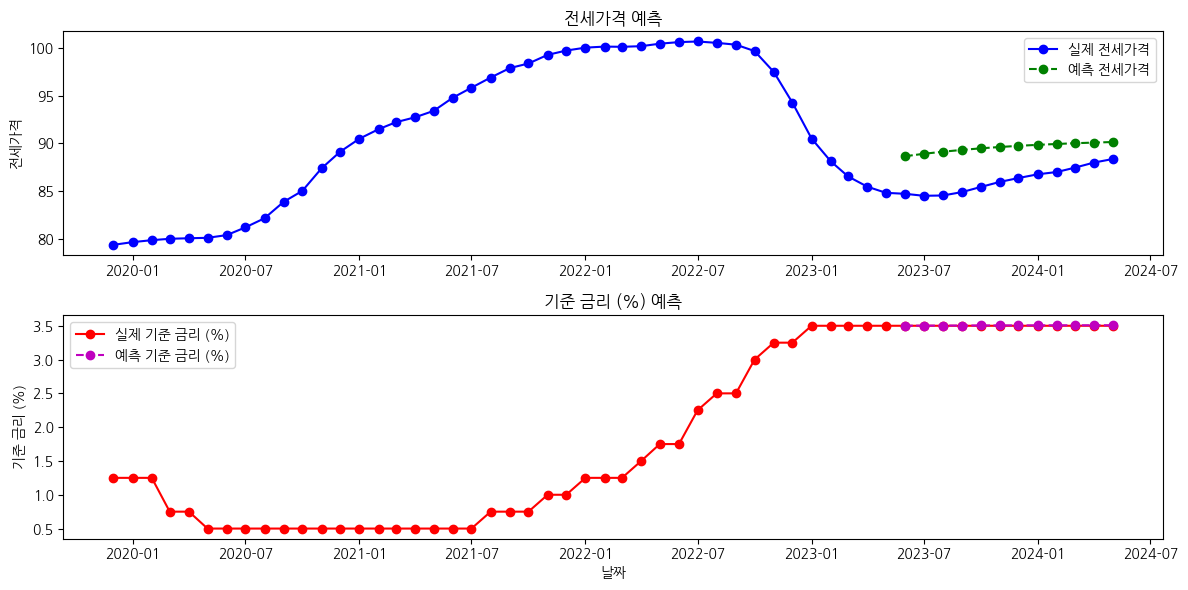

In [ ]:
# ARIMA 모델 훈련 및 예측
model_price = ARIMA(price_series, order=(1, 1, 1))
model_fit_price = model_price.fit()

model_rate = ARIMA(rate_series, order=(1, 1, 1))
model_fit_rate = model_rate.fit()

# 예측
forecast_price = model_fit_price.forecast(steps=12)
forecast_rate = model_fit_rate.forecast(steps=12)

# 예측 결과 시각화
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(merged_df.index, price_series, marker='o', linestyle='-', color='b', label='실제 전세가격')
plt.plot(pd.date_range(start='2023-06-01', periods=12, freq='MS'), forecast_price, marker='o', linestyle='--', color='g', label='예측 전세가격')
plt.title('전세가격 예측')
plt.ylabel('전세가격')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(merged_df.index, rate_series, marker='o', linestyle='-', color='r', label='실제 기준 금리 (%)')
plt.plot(pd.date_range(start='2023-06-01', periods=12, freq='MS'), forecast_rate, marker='o', linestyle='--', color='m', label='예측 기준 금리 (%)')
plt.title('기준 금리 (%) 예측')
plt.ylabel('기준 금리 (%)')
plt.xlabel('날짜')
plt.legend()

plt.tight_layout()
plt.show()


이 그래프는 2019년 12월부터 2024년 5월까지의 시간에 따른 서울의 전세가격과 한국은행 기준금리를 보여줍니다. 왼쪽의 파란색 점들은 실제 전세가격을 나타내며, 오른쪽의 녹색 점선은 우리가 예측한 전세가격입니다. 그래프를 보면 전세가격은 시간이 지남에 따라서 조금씩 상승하는 경향을 보이고 있습니다. 기준금리는 막대로 나타내어져 있는데요, 이것은 시간이 지남에 따라 일정하게 변화하고 있습니다.

서울의 전세가격과 기준금리 간의 상관관계는 거의 미미한 것으로 나타났습니다. 상관관계 계수가 -0.080으로 매우 낮게 나왔으며, 이는 두 변수 간에는 거의 선형적인 관계가 없음을 의미합니다. 따라서 기준금리가 변화해도 전세가격이 크게 영향을 받지 않을 가능성이 높습니다.
